<a href="https://colab.research.google.com/github/AT100/cmpt733-deepfake-detection/blob/main/mesonet_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.models import Model as KerasModel
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout, Reshape, Concatenate, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
import matplotlib.pylab as plt
from PIL import Image
import cv2
import pandas as pd
import os
from glob import glob
import numpy as np

In [3]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [4]:
import tensorflow as tf
from tensorflow import keras

In [5]:
from keras.utils import Sequence

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
IMGWIDTH = 256

In [7]:
optimizer = Adam(lr = 0.001)

x = Input(shape = (IMGWIDTH, IMGWIDTH, 3))

x1 = Conv2D(8, (3, 3), padding='same', activation = 'relu')(x)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(2, 2), padding='same')(x1)

x2 = Conv2D(8, (5, 5), padding='same', activation = 'relu')(x1)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(2, 2), padding='same')(x2)

x3 = Conv2D(16, (5, 5), padding='same', activation = 'relu')(x2)
x3 = BatchNormalization()(x3)
x3 = MaxPooling2D(pool_size=(2, 2), padding='same')(x3)

x4 = Conv2D(16, (5, 5), padding='same', activation = 'relu')(x3)
x4 = BatchNormalization()(x4)
x4 = MaxPooling2D(pool_size=(4, 4), padding='same')(x4)

y = Flatten()(x4)
y = Dropout(0.5)(y)
y = Dense(16)(y)
y = LeakyReLU(alpha=0.1)(y)
y = Dropout(0.5)(y)
y = Dense(1, activation = 'sigmoid')(y)


model = keras.Model(inputs = x, outputs = y)
model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
# model.load('dataset/Meso4_DF.h5')

In [ ]:
rmdir train_images/.ipynb_checkpoints

rmdir: failed to remove 'train_images/.ipynb_checkpoints': No such file or directory


In [8]:
# 2 - Minimial image generator
dataGenerator = ImageDataGenerator(rescale=1./255)
train_generator = dataGenerator.flow_from_directory(
        '/content/drive/MyDrive/Colab Notebooks/train_images',
        target_size=(256, 256),
        batch_size=32,
        class_mode='binary',
        subset='training')
train_generator.class_indices

Found 3911 images belonging to 2 classes.


{'fake': 0, 'real': 1}

In [ ]:
rmdir val_images/.ipynb_checkpoints

rmdir: failed to remove 'val_images/.ipynb_checkpoints': No such file or directory


In [9]:
##### Validation ########
dataGenerator = ImageDataGenerator(rescale=1./255)
valid_generator = dataGenerator.flow_from_directory(
        '/content/drive/MyDrive/Colab Notebooks/val_images',
        target_size=(256, 256),
        batch_size=32,
        class_mode='binary')
valid_generator.class_indices

Found 2181 images belonging to 2 classes.


{'fake': 0, 'real': 1}

In [ ]:
from platform import python_version_tuple
from keras.utils import to_categorical

class_mode = 'binary'

if python_version_tuple()[0] == '3':
    xrange = range
    izip = zip
    imap = map
else:
    from itertools import izip, imap

x, y = izip(*(train_generator[i] for i in xrange(len(train_generator))))

x_train = np.vstack(x)
y_train = np.vstack(imap(to_categorical, y))[:,0]

x_1, y_1 = izip(*(valid_generator[i] for i in xrange(len(valid_generator))))

x_val = np.vstack(x_1)
y_val = np.vstack(imap(to_categorical, y_1))[:,0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


In [10]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size

model.fit(train_generator,
                      steps_per_epoch=STEP_SIZE_TRAIN,
                      epochs=10,
                      validation_data=valid_generator,
                      validation_steps=STEP_SIZE_VALID,
                      workers=4)

Epoch 1/10
122/122 [==============================] - 16s 104ms/step - loss: 0.8379 - accuracy: 0.7604 - val_loss: 0.5140 - val_accuracy: 0.7960
Epoch 2/10
122/122 [==============================] - 12s 100ms/step - loss: 0.5045 - accuracy: 0.8035 - val_loss: 0.5728 - val_accuracy: 0.7886
Epoch 3/10
122/122 [==============================] - 12s 97ms/step - loss: 0.4634 - accuracy: 0.8126 - val_loss: 0.6228 - val_accuracy: 0.7854
Epoch 4/10
122/122 [==============================] - 12s 98ms/step - loss: 0.4509 - accuracy: 0.8204 - val_loss: 0.5206 - val_accuracy: 0.7753
Epoch 5/10
122/122 [==============================] - 12s 98ms/step - loss: 0.4308 - accuracy: 0.8415 - val_loss: 0.4799 - val_accuracy: 0.7904
Epoch 6/10
122/122 [==============================] - 12s 98ms/step - loss: 0.4623 - accuracy: 0.8020 - val_loss: 0.4629 - val_accuracy: 0.7932
Epoch 7/10
122/122 [==============================] - 12s 99ms/step - loss: 0.4408 - accuracy: 0.8305 - val_loss: 0.4642 - val_accurac

In [11]:
model.evaluate(valid_generator)

69/69 [==============================] - 6s 81ms/step - loss: 0.4348 - accuracy: 0.7978


[0.434764564037323, 0.7977991700172424]

In [ ]:
rmdir test_images/.ipynb_checkpoints

In [12]:
dataGenerator_test = ImageDataGenerator(rescale=1./255)
generator_test = dataGenerator_test.flow_from_directory(
       '/content/drive/MyDrive/Colab Notebooks/test_images',
        target_size=(256, 256),
        batch_size=1,
        class_mode='binary')
generator_test.class_indices

Found 4 images belonging to 2 classes.


{'fake': 0, 'real': 1}

0
Predicted : 0 
Real class : 1.0
0
Predicted : 0 
Real class : 1.0
0
Predicted : 0 
Real class : 0.0
0
Predicted : 0 
Real class : 0.0


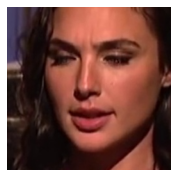

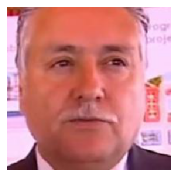

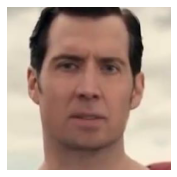

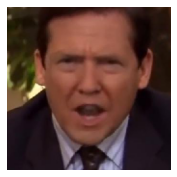

In [13]:
# 3 - Predict
for i in range(generator_test.n):
    X1, y1 = generator_test.next()
    #print(f"\nCorrect prediction: {round(1 - model.predict(X1)[0][0]) == y1[0]}")
    print(round(model.predict(X1)[0][0]))
    print('Predicted :', round(model.predict(X1)[0][0]), '\nReal class :', y1[0])
    plt.figure(figsize=(6, 3))
    plt.imshow(X1[0])
    plt.axis('off')

In [14]:
model.save('model.h5')

# New Section